In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predicta-1-0-predict-the-unpredictable/submission_key.csv
/kaggle/input/predicta-1-0-predict-the-unpredictable/sample_submission.csv
/kaggle/input/predicta-1-0-predict-the-unpredictable/historical_weather.csv


In [2]:
X_first = pd.read_csv("/kaggle/input/predicta-1-0-predict-the-unpredictable/historical_weather.csv")
X_test = pd.read_csv("/kaggle/input/predicta-1-0-predict-the-unpredictable/submission_key.csv",index_col =0)
X_first.head()

,city_id,date,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh
0,C001,2014-01-01,6.6,-1.4,11.6,NaN,NaN,168.0,6.2
1,C001,2014-01-02,9.3,6.3,13.3,NaN,NaN,155.0,10.0
2,C001,2014-01-03,7.6,1.9,14.0,NaN,NaN,NaN,5.8
3,C001,2014-01-04,7.6,3.9,13.3,NaN,NaN,291.0,11.3
4,C001,2014-01-05,8.6,0.5,16.9,NaN,NaN,NaN,5.0


In [3]:
X_test['city_id'] = X_test['city_id'].str[1:].astype(int)
print(X_test)

               city_id        date
submission_ID                     
1                    1  2019-01-01
2                    1  2019-01-02
3                    1  2019-01-03
4                    1  2019-01-04
5                    1  2019-01-05
...                ...         ...
696                112  2019-01-03
697                112  2019-01-04
698                112  2019-01-05
699                112  2019-01-06
700                112  2019-01-07

[700 rows x 2 columns]


In [4]:
#print(X_first['date'].dtype)
X_first['date'] = pd.to_datetime(X_first['date'], format='%Y-%m-%d')
X_test['date'] = pd.to_datetime(X_test['date'], format='%Y-%m-%d')
#print(X_first['date'].dtype)
X_first['day_of_year'] = X_first['date'].dt.dayofyear
X_test['day_of_year'] = X_test['date'].dt.dayofyear
X_first['year'] = X_first['date'].dt.year
X_test['year'] = X_test['date'].dt.year
print(X_first.shape)
X_first.head()
print(X_test)


(182338, 11)
               city_id       date  day_of_year  year
submission_ID                                       
1                    1 2019-01-01            1  2019
2                    1 2019-01-02            2  2019
3                    1 2019-01-03            3  2019
4                    1 2019-01-04            4  2019
5                    1 2019-01-05            5  2019
...                ...        ...          ...   ...
696                112 2019-01-03            3  2019
697                112 2019-01-04            4  2019
698                112 2019-01-05            5  2019
699                112 2019-01-06            6  2019
700                112 2019-01-07            7  2019

[700 rows x 4 columns]


In [5]:
# Correctly filter the DataFrame using bitwise operator
X_filtered = X_first[(X_first['day_of_year'] <= 14) | (X_first['day_of_year'] >= 358)]
X_filtered.loc[X_filtered['day_of_year'] >= 358, 'day_of_year'] = X_filtered['day_of_year'] - 366

# Display the filtered DataFrame
X_filtered.head()

,city_id,date,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,day_of_year,year
0,C001,2014-01-01,6.6,-1.4,11.6,NaN,NaN,168.0,6.2,1,2014
1,C001,2014-01-02,9.3,6.3,13.3,NaN,NaN,155.0,10.0,2,2014
2,C001,2014-01-03,7.6,1.9,14.0,NaN,NaN,NaN,5.8,3,2014
3,C001,2014-01-04,7.6,3.9,13.3,NaN,NaN,291.0,11.3,4,2014
4,C001,2014-01-05,8.6,0.5,16.9,NaN,NaN,NaN,5.0,5,2014


Handling NaN values


In [6]:
print("Total number of column")
print(X_filtered.size)

# Print the number of NaN values for each column
nan_counts = X_filtered.isna().sum()
print("Number of NaN values in each column:")
print(nan_counts)

Total number of column
121836
Number of NaN values in each column:
city_id                  0
date                     0
avg_temp_c              72
min_temp_c             374
max_temp_c             424
precipitation_mm      4447
snow_depth_mm         9835
avg_wind_dir_deg      2318
avg_wind_speed_kmh    1460
day_of_year              0
year                     0
dtype: int64


In [7]:
rows_with_missing_values = X_filtered[X_filtered[['avg_temp_c']].isna().any(axis=1)]
nan_counts = rows_with_missing_values.isna().sum()
print("Number of NaN values in each column which already missed avg_temp:")
print(nan_counts)
rows_with_missing_values.head()

Number of NaN values in each column which already missed avg_temp:
city_id                0
date                   0
avg_temp_c            72
min_temp_c             0
max_temp_c             0
precipitation_mm       0
snow_depth_mm         21
avg_wind_dir_deg      72
avg_wind_speed_kmh    69
day_of_year            0
year                   0
dtype: int64


,city_id,date,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,day_of_year,year
125817,C082,2014-01-02,NaN,21.7,28.9,0.0,0.0,NaN,10.4,2,2014
125819,C082,2014-01-04,NaN,22.8,28.3,0.5,NaN,NaN,14.0,4,2014
125820,C082,2014-01-05,NaN,23.9,28.3,15.2,0.0,NaN,14.4,5,2014
148426,C094,2015-12-31,NaN,2.3,11.4,0.0,NaN,NaN,NaN,-1,2015
153169,C097,2014-01-01,NaN,1.3,5.2,4.8,NaN,NaN,NaN,1,2014


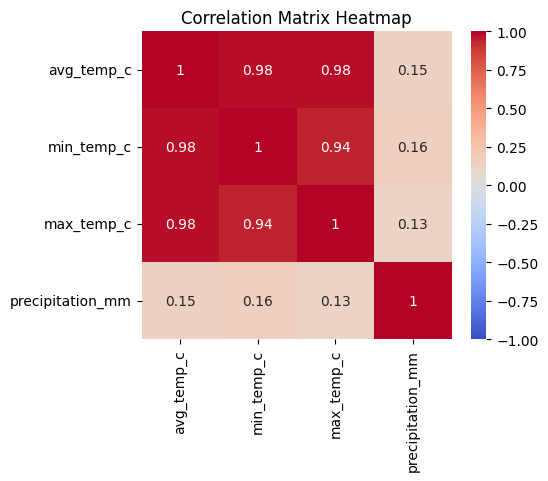

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = X_filtered[['avg_temp_c','min_temp_c','max_temp_c','precipitation_mm']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(5, 4))

# Draw the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Set titles and labels
plt.title('Correlation Matrix Heatmap')
plt.show()

**Precipitation does not correalte with average temperature**

In [9]:
X=X_filtered.copy()
X['avg_temp_c'] = X_filtered.apply(
    lambda row: (row['min_temp_c'] + row['max_temp_c']) / 2 if pd.isna(row['avg_temp_c']) else row['avg_temp_c'],
    axis=1
)
X.head()

,city_id,date,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,day_of_year,year
0,C001,2014-01-01,6.6,-1.4,11.6,NaN,NaN,168.0,6.2,1,2014
1,C001,2014-01-02,9.3,6.3,13.3,NaN,NaN,155.0,10.0,2,2014
2,C001,2014-01-03,7.6,1.9,14.0,NaN,NaN,NaN,5.8,3,2014
3,C001,2014-01-04,7.6,3.9,13.3,NaN,NaN,291.0,11.3,4,2014
4,C001,2014-01-05,8.6,0.5,16.9,NaN,NaN,NaN,5.0,5,2014


In [10]:
y_final=X['avg_temp_c']
X_final = X[['city_id','day_of_year','year']]
X_final['city_id'] = X_final['city_id'].str[1:].astype(int)
print(X_final)

        city_id  day_of_year  year
0             1            1  2014
1             1            2  2014
2             1            3  2014
3             1            4  2014
4             1            5  2014
...         ...          ...   ...
182333      112           -5  2018
182334      112           -4  2018
182335      112           -3  2018
182336      112           -2  2018
182337      112           -1  2018

[11076 rows x 3 columns]


/tmp/ipykernel_18/359853485.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_final['city_id'] = X_final['city_id'].str[1:].astype(int)


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from scipy.stats import uniform, randint
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [13]:
# Define the parameter distributions
param_dist = {
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 10),
    'n_estimators': randint(5, 10000),
    'colsample_bytree': uniform(0.3, 0.999999999),
    'alpha': randint(1, 20)
}

# Initialize the XGBRegressor
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=100, scoring='neg_mean_squared_error',
                                   cv=5, verbose=1, random_state=0, n_jobs=-1)

# Fit the RandomizedSearchCV with early stopping
early_stopping_rounds = 10
fit_params = {
    "eval_set": [(X_val, y_val)],
    "early_stopping_rounds": early_stopping_rounds,
    "verbose": False
}

In [14]:
random_search.fit(X_train, y_train, **fit_params)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`se

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'colsample_bytree': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78a08a6f93f0>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78a0b30a1ed0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a08a6f8d90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78a0b30a1d20>},
                   random_state=0, scoring='neg_mean_squared_error', verbose=1)

In [15]:
# Get the best parameters
best_params = random_search.best_params_
print("Best parameters found: ", best_params)

# Get the best estimator
best_model = random_search.best_estimator_

# Predict on validation set
val_predictions = best_model.predict(X_val)

# Calculate RMSE
val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
print(f"Validation RMSE: {val_rmse}")


Best parameters found:  {'alpha': 11, 'colsample_bytree': 0.8528214793347499, 'learning_rate': 0.05948213807256524, 'max_depth': 8, 'n_estimators': 8834}
Validation RMSE: 2.561650244368904


In [16]:
X_test = X_test.drop(['date'],axis=1)
print(X_test)
y_test = best_model.predict(X_test)

               city_id  day_of_year  year
submission_ID                            
1                    1            1  2019
2                    1            2  2019
3                    1            3  2019
4                    1            4  2019
5                    1            5  2019
...                ...          ...   ...
696                112            3  2019
697                112            4  2019
698                112            5  2019
699                112            6  2019
700                112            7  2019

[700 rows x 3 columns]


In [17]:
submission = pd.read_csv("/kaggle/input/predicta-1-0-predict-the-unpredictable/sample_submission.csv",index_col=0)
submission['avg_temp_c']=y_test
print(submission)

               avg_temp_c
submission_ID            
1                9.421526
2                9.390841
3                9.251614
4                9.359315
5                9.083170
...                   ...
696             21.815166
697             21.872641
698             21.565763
699             20.488647
700             20.521017

[700 rows x 1 columns]


In [18]:
submission.to_csv("submission.csv")